In [13]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [14]:
all_df = pd.read_csv("data/data2.csv")

In [15]:
X=all_df.drop(['readmitted'], axis=1).values.astype('float64')
Y = all_df['readmitted'].values.astype('int64')

In [16]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78441

In [17]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [18]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [19]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [20]:
model = Sequential()

In [21]:
model.add(LSTM(units=70, input_shape=(70,1)))

In [22]:
model.add(Dense(1, activation = "sigmoid"))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 70)                20160     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 71        
Total params: 20,231
Trainable params: 20,231
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [25]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=60, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 70596 samples, validate on 7845 samples
Epoch 1/60
70596/70596 [==============================] - 113s 2ms/step - loss: 0.6909 - acc: 0.5345 - val_loss: 0.6914 - val_acc: 0.5250
Epoch 2/60
70596/70596 [==============================] - 148s 2ms/step - loss: 0.6891 - acc: 0.5388 - val_loss: 0.6829 - val_acc: 0.5579
Epoch 3/60
70596/70596 [==============================] - 107s 2ms/step - loss: 0.6790 - acc: 0.5683 - val_loss: 0.6980 - val_acc: 0.5363
Epoch 4/60
70596/70596 [==============================] - 88s 1ms/step - loss: 0.6797 - acc: 0.5672 - val_loss: 0.6858 - val_acc: 0.5591


In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

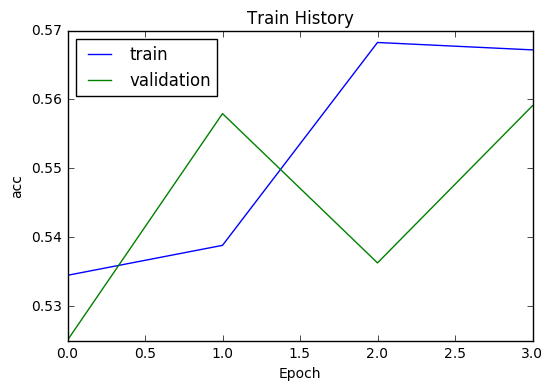

In [27]:
show_train_history(train_history,'acc','val_acc')

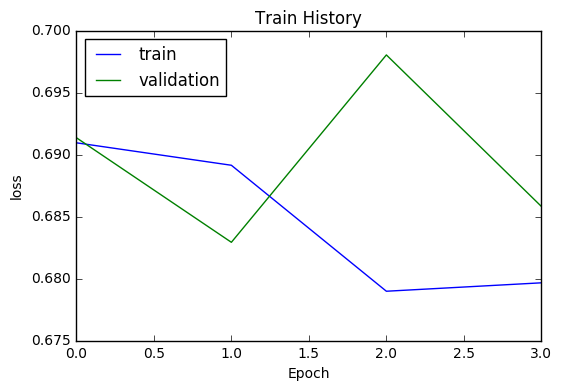

In [28]:
show_train_history(train_history,'loss','val_loss')

In [29]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19611/19611 [==============================] - 14s 720us/step


In [30]:
scores[1]

0.560756718195729